# Atom/bond features from SMILES

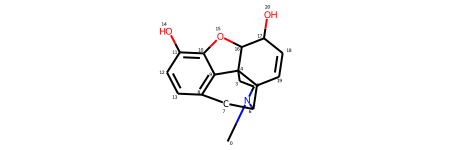

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
mol = Chem.MolFromSmiles('CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O')
mol

In [2]:
#https://github.com/NREL/nfp/blob/master/nfp/preprocessing/features.py
from rdkit import Chem
def atom_features_v1(atom):
    """ Return an integer hash representing the atom type
    """

    return str((
        atom.GetSymbol(),
        atom.GetDegree(),
        atom.GetTotalNumHs(),
        atom.GetImplicitValence(),
        atom.GetIsAromatic(),
    ))

def bond_features_v1(bond, **kwargs):
    """ Return an integer hash representing the bond type.
    
    flipped : bool
        Only valid for 'v3' version, whether to swap the begin and end atom types
    """

    return str((
        bond.GetBondType(),
        bond.GetIsConjugated(),
        bond.IsInRing(),
        sorted([
            bond.GetBeginAtom().GetSymbol(),
            bond.GetEndAtom().GetSymbol()]),
    ))


for atom in mol.GetAtoms():
    print(atom_features_v1(atom))

for bond in mol.GetBonds():
    print(bond_features_v1(bond))

('C', 1, 3, 3, False)
('N', 3, 0, 0, False)
('C', 2, 2, 2, False)
('C', 2, 2, 2, False)
('C', 4, 0, 0, False)
('C', 3, 1, 1, False)
('C', 3, 1, 1, False)
('C', 2, 2, 2, False)
('C', 3, 0, 0, True)
('C', 3, 0, 0, True)
('C', 3, 0, 0, True)
('C', 3, 0, 0, True)
('C', 2, 1, 1, True)
('C', 2, 1, 1, True)
('O', 1, 1, 1, False)
('O', 2, 0, 0, False)
('C', 3, 1, 1, False)
('C', 3, 1, 1, False)
('C', 2, 1, 1, False)
('C', 2, 1, 1, False)
('O', 1, 1, 1, False)
(rdkit.Chem.rdchem.BondType.SINGLE, False, False, ['C', 'N'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'N'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.AROMATIC, True, True, ['C',

# Molecular Descriptors

In [3]:
from rdkit.Chem.rdMolDescriptors \
import CalcNumRings, CalcNumAromaticRings, CalcNumAliphaticRings

print(CalcNumRings(mol), CalcNumAromaticRings(mol), CalcNumAliphaticRings(mol))

SSSR = Chem.GetSymmSSSR(mol)
for sssr in SSSR:
    # atom indices of each ring
    print(list(sssr))

5 1 4
[1, 6, 5, 4, 3, 2]
[7, 8, 9, 4, 5, 6]
[11, 12, 13, 8, 9, 10]
[15, 10, 9, 4, 16]
[17, 18, 19, 5, 4, 16]


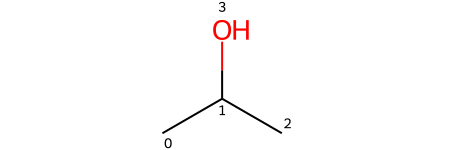

In [4]:
from rdkit import Chem
mol = Chem.MolFromSmiles('CC(C)O')
mol

In [5]:
print(Chem.rdmolops.GetAdjacencyMatrix(mol))
print(Chem.rdmolops.GetDistanceMatrix(mol))

[[0 1 0 0]
 [1 0 1 1]
 [0 1 0 0]
 [0 1 0 0]]
[[0. 1. 2. 2.]
 [1. 0. 1. 1.]
 [2. 1. 0. 2.]
 [2. 1. 2. 0.]]


# Topological Descriptors

Example - Boiling point vs. Topological index

In [6]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.GraphDescriptors import BalabanJ, BertzCT, Chi0, Chi1
from rdkit.Chem.rdMolDescriptors import CalcTPSA

# We will cover pandas soon..
df = pd.read_csv('BP.csv')
list_smiles = list(df['canonical_smiles'])
list_BP = list(df['BP'])

balaban_j = [BalabanJ(Chem.MolFromSmiles(smi)) for smi in list_smiles]
bertz_ct = [BertzCT(Chem.MolFromSmiles(smi)) for smi in list_smiles]
chi0 = [Chi0(Chem.MolFromSmiles(smi)) for smi in list_smiles]
chi1 = [Chi1(Chem.MolFromSmiles(smi)) for smi in list_smiles]
tpsa = [CalcTPSA(Chem.MolFromSmiles(smi)) for smi in list_smiles]

x_and_y = [balaban_j, bertz_ct, chi0, chi1, tpsa, list_BP]
corr_matrix = np.corrcoef(x_and_y)

In [7]:
# Boiling point vs. each descriptor
corr_matrix[-1]

array([0.19977474, 0.40589556, 0.72187375, 0.74827042, 0.12420726,
       1.        ])

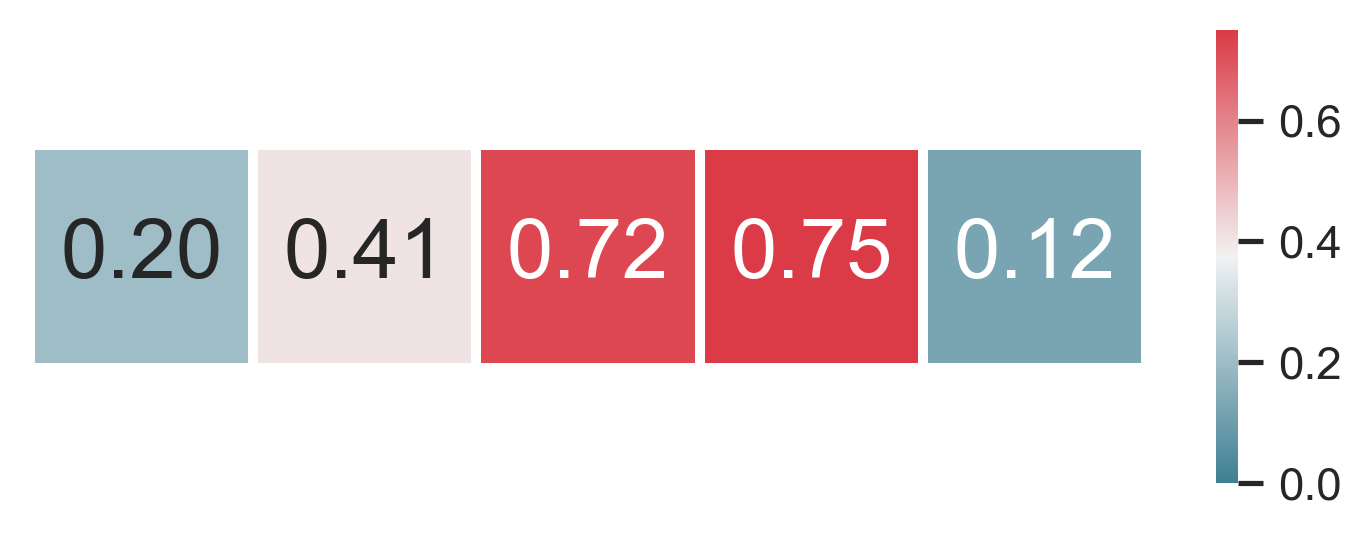

In [20]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline
plt.rcParams['figure.dpi'] = 300

sns.set(style="white", font_scale=1)

# Compute the correlation matrix
#corr = [corr_matrix[-1]]
corr = [corr_matrix[-1][0:-1]]

f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, cmap=cmap, vmin=.0, vmax=.75, annot=True, fmt='.2f',
            square=True, linewidths=2.0, cbar_kws={"shrink": .5}, annot_kws={"size": 20})

#ax.set_xticklabels( ['BalabanJ', 'BertzCT', 'Chi0', 'Chi1', 'TPSA','Boiling Point'], rotation=45);
ax.set_xticklabels( ['', '', '', '', ''], rotation=45);
#ax.set_yticklabels(['boiling point'],rotation=45);
ax.set_yticklabels([''],rotation=45);

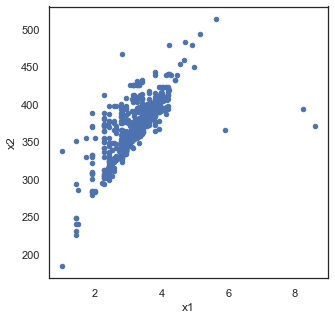

In [9]:


fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

#ax.set_xlim([0.0,1.0])
#ax.set_ylim([0.0,1.0])
#ax.set_xticks(np.arange(0.0,1.0,0.1))
#ax.set_yticks(np.arange(0.0,1.0,0.1))

plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 20})

plt.xlabel('x1')
plt.ylabel('x2')

#x: chi1, y: boiling point
plt.scatter(chi1,list_BP, s = 20)
#plt.scatter(tpsa,list_BP, s = 20)

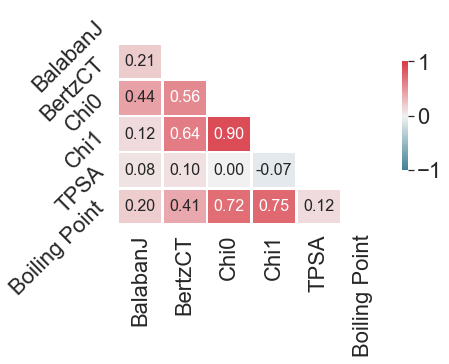

In [10]:
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = corr_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f',
            square=False, linewidths=1.5, cbar_kws={"shrink": .5}, annot_kws={"size": 16})
ax.set_xticklabels(['BalabanJ', 'BertzCT', 'Chi0', 'Chi1', 'TPSA','Boiling Point'],rotation=90);
ax.set_yticklabels(['BalabanJ', 'BertzCT', 'Chi0', 'Chi1', 'TPSA','Boiling Point'],rotation=45);